In [53]:
import os
import pandas as pd
from datetime import datetime, timedelta
from gensim import corpora, models
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nicolasmalz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
directory = 'output_texts/'

texts = []


# Loop through the file range
for i in range(1, 500):
    file_path = os.path.join(directory, f'{i}.txt')

    # Check if the file exists to avoid errors
    if os.path.exists(file_path):
        with open(file_path, 'r', encoding='utf-8') as file:
            texts.append(file.read())
    else:
        print(f"File {i}.txt not found.")

File 2.txt not found.
File 3.txt not found.
File 4.txt not found.
File 5.txt not found.
File 205.txt not found.
File 217.txt not found.
File 243.txt not found.
File 313.txt not found.
File 332.txt not found.
File 456.txt not found.
File 485.txt not found.
File 486.txt not found.
File 487.txt not found.
File 488.txt not found.
File 489.txt not found.
File 490.txt not found.
File 491.txt not found.
File 492.txt not found.
File 493.txt not found.
File 494.txt not found.
File 495.txt not found.
File 496.txt not found.
File 497.txt not found.
File 498.txt not found.
File 499.txt not found.


In [33]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')



# Initialize a Porter Stemmer for stemming
stemmer = PorterStemmer()

# Initialize stopwords (commonly used words that are generally ignored)
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lowercasing and removing punctuation
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    
    return tokens

# Apply preprocessing to each document
preprocessed_texts = [preprocess_text(text) for text in texts]

# Join the tokens back together

texts_for_tfidf = [" ".join(doc) for doc in preprocessed_texts]


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nicolasmalz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nicolasmalz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
# Instantiate and adjust TF-IDF Vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.1, min_df=5, ngram_range=(1,5))

# Apply the vectorizer to the processed texts
tfidf_matrix = tfidf_vectorizer.fit_transform(texts_for_tfidf)

/Users/nicolasmalz/miniforge3/envs/base2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Top terms per cluster:
Cluster 0: mountaintop, mahan, pari climat, ultra mega, ultra, alpha, mega, alaska, mega power, ultra mega power
Cluster 1: mwh, per mwh, manchin, us per mwh, methan emiss, bnef, biden, onshor, onshor wind, lazard
Cluster 2: nersa, randazzo, june pdf, agl, puco, moratorium, eph, export credit, zimbabw, invas
Cluster 3: bumi, mtpa, mahan, marin, ambr, hazelwood, marin park, southgobi, southgobi resourc, ambr energi
Cluster 4: load shed, pari agreement goal, agreement goal, blackrock, balkan, bulgaria, vanguard, arc, western balkan, global heat
Cluster 5: news bulletin, weekli news, weekli news bulletin, unit state, coal industri highlight effort, signific develop affect global coal, coal industri highlight, world work issu, world work, news bulletin summaris signific
Cluster 6: ember, hindenburg, kwh, sasol, hindenburg research, sebi, speaker, godda, cumbria, per kwh
Cluster 7: drummond, coronaviru, tennesse, murray, ge, eia, carbon tracker, inform administr, robi

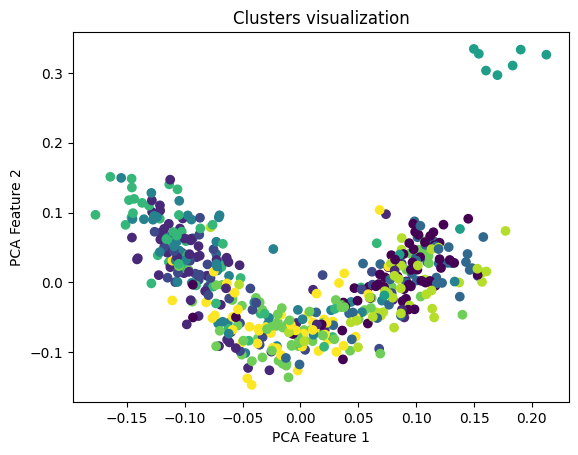

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Number of clusters
num_clusters = 10  # Adjust based on your data

# Perform K-Means clustering
km = KMeans(n_clusters=num_clusters, random_state=42)
clusters = km.fit_predict(tfidf_matrix)

# Analyzing clusters (optional: print top terms per cluster)
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()
for i in range(num_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i}: {', '.join(top_ten_words)}")

# Visualization (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=clusters)
plt.title("Clusters visualization")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.show()


In [48]:
from gensim.models import KeyedVectors

# Load the pre-trained Word2Vec model (this might take some time)
model = KeyedVectors.load_word2vec_format('vectors/GoogleNews-vectors-negative300.bin', binary=True)


In [50]:
import numpy as np

def document_vector(word2vec_model, doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.key_to_index]
    if len(doc) == 0:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(word2vec_model[doc], axis=0)

# Assuming 'processed_texts' is your list of preprocessed documents
doc_vectors = np.array([document_vector(model, doc) for doc in texts_for_tfidf])
